# CS429: Information Retrieval

<br>

## Lecture 15: Classification and Machine Learning

<br>

### Dr. Aron Culotta
### Illinois Institute of Technology



## What is machine learning?

<br><br><br><br>

## What is machine learning?

- [Dietterich: "Machine Learning"](http://web.engr.oregonstate.edu/~tgd/publications/nature-ecs-machine-learning.pdf)
- [Domingos: "A few useful things to know about machine learning"](http://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)


## What is machine learning?

"Study of methods for programming computers to learn." 

-- Dietterich


## What is machine learning?

Study of systems that "automatically learn programs from data" 

-- Domingos


## What is machine learning?

A problem-solving technique that solves future problem instances based on
patterns found in past problem instances

![spam](images/spam.png)

<img src='images/search.png' width='50%'/>

<img src='images/netflix.png', width='70%'/>

<img src='images/bw.png' width='50%'/>

<img src='images/chopper.png' width='70%'>

<img src='images/car.jpg' width='70%'/>

![money](images/money.png)

<img src='images/doc.png' width='40%'/>

<img src='images/siri.png' width='40%'/>

<img src='images/watson.png' width='70%'/>

## Notation

- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=0$: not spam
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.

## Problem types

- **Classification**
  - $\vec{x}$: image of a person ;  $y$: gender
- **Regression**
  - $\vec{x}$: image of a person ; $y$: age
- **Clustering**
  - $\vec{x}$: images of people ; $y$: cluster id of people that look similar
- **Structured classification**
  - $\vec{x}$: image of a person ; $\vec{y}$: location of their eyes and ears
  - $X$: sequence of images of people ; $Y$: subsequences containing people running

## Workflow

1. **Collect** raw data: emails
2. Manually **categorize** them:  spam or not
3. **Vectorize**: email -> word counts [**features**]
4. **Train** / **Fit**: create $f(x)$
5. **Collect** new raw data
6. **Predict**: compute $f(x)$ for new $x$

## Example: Spam Classification

**Steps 1 & 2: Collect and categorize**

**Spam:**

> Free credit report!


> Free money!


**Not spam:**

> Are you free tonight?

> How are you?


**Step 3: Vectorize**

> 'Free money!'

becomes

```
free: 1
money: 1
!: 1
?: 0
credit: 0
...
```

**Representation**: "Feature engineering is the key" -- Domingos


**Step 4: Train/Fit**

Which model to use?

- Naive Bayes
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors
- Support Vector Machines
- ... many many more

**Steps 5-6: Predict on new data**

> Free vacation!

**Spam**

How do you know if it works?

In [53]:
# X: each row is a feature vector for one document.
X = [(0, 0),
     (1, 0),
     (0,3),
     (1,3),
#       (1,3)
    ]
# y: element i is a label for ith document
y = [0, 0, 1, 1] # , 0]

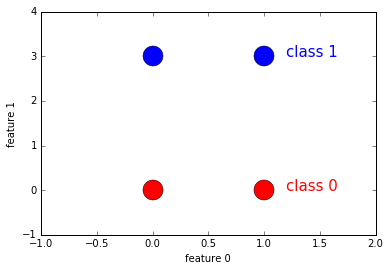

In [54]:
# Plot the data. 
# Red means class 0, blue means class 1.
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X, y):
    """ Assumes 2-d data. """
    plt.figure()
    for xi, yi in zip(X, y):
        color = 'r' if yi == 0 else 'b'
        plt.plot(xi[0], xi[1], color + 'o', ms=20)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.xlim((-1,2))
    plt.ylim((-1, 4))
    plt.annotate('class 0', xy=(1.2, 0), color='r', size=15)
    plt.annotate('class 1', xy=(1.2, 3), color='b', size=15)
    plt.show()
    
plot_data(X, y)

In [55]:
# Simplest machine learning algorithm:

class SimplestMachine:
    
    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
          self.f[xi] = yi

    def predict(self, x):
        return self.f[x]

# What does this do?

In [56]:
simplest_machine = SimplestMachine()
simplest_machine.train(X, y)
predictions = [simplest_machine.predict(xi) for xi in X]
print('pred\ttruth\n', '\n'.join('%d\t%d' % (p, yi) for p, yi in zip(predictions, y)))

pred	truth
 0	0
0	0
1	1
1	1


In [40]:
# What does it do for unseen example?
simplest_machine.predict((0, 4))

KeyError: (0, 4)

In [6]:
# Second simplest machine learning algorithm:
import numpy as np

class SimpleMachine:

    def __init__(self):
        self.f = dict()

    def train(self, X, y):
        for xi, yi in zip(X, y):
          self.f[xi] = yi

    def predict(self, x):
        x_closest = self.find_most_similar(x)
        return self.f[x_closest]
    
    def find_most_similar(self, x):
        best_idx = np.argmin([self.distance(x, xi) 
                              for xi in self.f.keys()])
        print('closest match is', list(self.f.keys())[best_idx])
        return list(self.f.keys())[best_idx]

    def distance(self, x, xi):
        return np.sqrt(np.sum((np.array(x)-np.array(xi))**2))
        
# What does this do?

In [7]:
simple_machine = SimpleMachine()
simple_machine.train(X, y)
predictions = [simple_machine.predict(xi) for xi in X]
print('pred\ttruth\n', '\n'.join('%d\t%d' % (p, yi) for p, yi in zip(predictions, y)))

NameError: name 'X' is not defined

In [ ]:
# What does it do for unseen example?
simple_machine.predict((0, 4))

<img src='images/knn.png' width='80%'/>

<http://www.scholarpedia.org/article/K-nearest_neighbor>


## Generalization

How accurate will I be on a new, unobserved example?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
   - Why not ${\mathcal D_1}$?

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

How do you know if it works?

1. Train on data ${\mathcal D_1}$
2. Predict on data ${\mathcal D_2}$
3. Compute accuracy on ${\mathcal D_2}$.
4. Tweak algorithm / representation
5. Repeat

How many times can I do this?


## Measuring Generalization

- Cross-validation
  - train on 90%, test on 10%, repeat 10 x's
        - each example appears only once in test set


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat


## Experimental Design

1. Collect data
2. Build model
3. Compute cross-validation accuracy
4. Tune model
5. Repeat
6. **Report accuracy on new data**


- What is overfitting? How do you know it is happening? How do you fix?

<img src='images/biasvariance.png' width='70%'/>

<http://scott.fortmann-roe.com/docs/BiasVariance.html>

## Machine Learning for Sentiment Analysis

1. Collect data: E.g., <http://help.sentiment140.com/for-students>

In [ ]:
# Download Twitter data labeled by sentiment.

import zipfile
from urllib.request import urlretrieve
# The file is 78M, so this will take a while.
url = urlretrieve('http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip', 'data.zip')
zfile = zipfile.ZipFile('data.zip')
zfile.extractall()


In [114]:
# We'll focus on the smaller file that was manually labeled.
# The larger file has 1.6M tweets "pseudo-labeled" using emoticons
tweet_file = open('testdata.manual.2009.06.14.csv')

In [108]:
# show a positive example.
!egrep '\"4' testdata.manual.2009.06.14.csv | head -1

"4","3","Mon May 11 03:17:40 UTC 2009","kindle2","tpryan","@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."


In [109]:
# show a negative example.
!egrep '\"0' testdata.manual.2009.06.14.csv | head -35 | tail -1

"0","219","Mon May 25 17:31:43 UTC 2009","exam","enriquenieto","I hate revision, it's so boring! I am totally unprepared for my exam tomorrow :( Things are not looking good..."


In [110]:
# show a neutral example.
!egrep '\"2' testdata.manual.2009.06.14.csv | head -1

"2","13","Mon May 11 03:32:42 UTC 2009","obama","jpeb","Check this video out -- President Obama at the White House Correspondents' Dinner http://bit.ly/IMXUM"


In [115]:
import csv
file_reader = csv.reader(tweet_file, delimiter=',', quotechar='"')
tweets = []
for row in file_reader:
    tweets.append({'label': int(row[0]),
                   'text': row[5]})
tweets = np.array(tweets)
print('read %d tweets' % len(tweets))

read 498 tweets


In [116]:
# Create label vector (y) and print its stats.
from collections import Counter
y = np.array([t['label'] for t in tweets])
print('label counts=', Counter(y))

label counts= Counter({4: 182, 0: 177, 2: 139})


In [119]:
# Create feature vectors (X) from text strings.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(t['text'] for t in tweets)
print('vectorized %d tweets. found %d terms.' % (X.shape[0], X.shape[1]))

vectorized 498 tweets. found 2264 terms.


In [120]:
# What is X?
X

<498x2264 sparse matrix of type '<class 'numpy.int64'>'
	with 6422 stored elements in Compressed Sparse Row format>

In [126]:
X[0]

<1x2264 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [127]:
# data: non-zero values.
X[0].data

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [128]:
# indices: index of non-zero values.
X[0].indices

array([1876, 1199, 1337, 1119, 1393, 1960, 1961,  652, 1060,  501,  362,
        737, 1021, 1064, 1458, 1669], dtype=int32)

In [129]:
# Which terms correspond to which columns?
vocab = np.array(vectorizer.get_feature_names())
vocab
# vocab is ordered by column index

array(['00', '000', '04fo', ..., 'zomg', 'zoom', 'zydrunas'], 
      dtype='<U40')

In [130]:
# So, non-zero terms in first row are:
vocab[X[0].indices]

array(['stellargirl', 'loooooooovvvvvveee', 'my', 'kindle2', 'not', 'that',
       'the', 'dx', 'is', 'cool', 'but', 'fantastic', 'in', 'its', 'own',
       'right'], 
      dtype='<U40')

In [131]:
# Double-check:
print(tweets[0])
print(y[0])

{'label': 4, 'text': '@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'}
4


In [132]:
# What are the most frequent terms?
# Sum columns:
col_sums = X.sum(axis=0).A1
# Sort sums in descending order, and return the indices.
top_indices = np.argsort(col_sums)[::-1]
print('top_indices=', top_indices)
top_terms = vocab[top_indices]
print('top_terms:')
list(zip(top_terms, top_indices))[:10]

top_indices= [1961 1998  988 ..., 1363 1364    0]
top_terms:


[('the', 1961),
 ('to', 1998),
 ('http', 988),
 ('is', 1060),
 ('and', 152),
 ('at', 209),
 ('it', 1062),
 ('for', 790),
 ('my', 1337),
 ('of', 1416)]

2.) Build model

In [133]:
# Fit a LogisticRegression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
# Predict on training data.
predicted = model.predict(X)

In [135]:
# Compute accuracy
def accuracy(truth, predicted):
    return (len([1 for tr, pr in zip(truth, predicted) if tr == pr]) / len(truth))

print('accuracy on training data=%.3f' % accuracy(y, predicted))

accuracy on training data=0.996


In [53]:
# Model inspection:
# Logistic regression has one real-valued parameter for each (feature, class) pair
model.coef_.shape

(3, 2264)

In [136]:
# weights for the positive class.
model.coef_[2]

array([-0.11694478, -0.04422996, -0.04308365, ...,  0.25238453,
       -0.13221204,  0.1750897 ])

In [137]:
# What are the top weighted features?
# Get the learned coefficients for the Positive class.
coef = model.coef_[2]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print('top weighted terms for positive class:')
list(zip(top_coef_terms, top_coef))[:10]

top weighted terms for positive class:


[('awesome', 1.5207939804767958),
 ('love', 1.5080417103616175),
 ('g2', 1.2252868549798153),
 ('good', 1.1735868088945105),
 ('kindle2', 1.0349501613531902),
 ('lebron', 0.953648523997499),
 ('great', 0.88798751556470601),
 ('mcdonalds', 0.81454565648964972),
 ('tonight', 0.80216396607369378),
 ('mashable', 0.8002958584312525)]

In [138]:
# Get the learned coefficients for the Negative class.
coef = model.coef_[0]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print('top weighted terms for negative class:')
list(zip(top_coef_terms, top_coef))[:10]

top weighted terms for negative class:


[('warner', 1.5575574474701563),
 ('hate', 1.2898069199262512),
 ('aig', 1.2761967996219201),
 ('gm', 1.0826104425890997),
 ('korea', 1.061361439980635),
 ('north', 1.061361439980635),
 ('not', 1.0523889298079891),
 ('cheney', 0.93733227107412254),
 ('that', 0.89150593439290238),
 ('fail', 0.8883378090677998)]

In [141]:
# 5-fold Cross-validation accuracy
from sklearn.cross_validation import KFold

cv = KFold(len(y), 5)
accuracies = []
for train_ind, test_ind in cv:
    model.fit(X[train_ind], y[train_ind])  # select just the training instances.
    predictions = model.predict(X[test_ind])
    accuracies.append(accuracy(y[test_ind], predictions))
    
print('Average 5-fold cross validation accuracy=%.2f (std=%.2f)' %
      (np.mean(accuracies), np.std(accuracies)))
accuracies

Average 5-fold cross validation accuracy=0.67 (std=0.04)


[0.64, 0.73, 0.64, 0.7070707070707071, 0.6565656565656566]

In [142]:
# Error analysis
train_ind = range(400)
test_ind = range(401, len(y))
model.fit(X[train_ind], y[train_ind])
predictions = model.predict(X[test_ind])
probabilities = model.predict_proba(X[test_ind])

In [143]:
probabilities.shape

(97, 3)

In [145]:
# P(y=y_k | x)
# What are most probable positives?
prob_pos = probabilities[:,2]  # get 3rd column == pos
topi = np.argsort(prob_pos)[::-1][:10]
list(zip(prob_pos[topi], tweets[400:][topi]))

[(0.90011587401933302,
  {'label': 2,
   'text': "Missed this insight-filled May column: One smart guy looking closely at why he's impressed with Kindle2 http://bit.ly/i0peY @wroush"}),
 (0.89912680669429568,
  {'label': 2,
   'text': 'all about Ajax,jquery ,css ,JavaScript and more... (many examples) http://ajaxian.com/'}),
 (0.88987977036981047,
  {'label': 2, 'text': '@johncmayer is Bobby Flay joining you?'}),
 (0.84758629612195957,
  {'label': 2,
   'text': "I'm truly braindead.  I couldn't come up with Warren Buffet's name to save my soul"}),
 (0.83704045706422547,
  {'label': 0,
   'text': "Shit's hitting the fan in Iran...craziness indeed #iranelection"}),
 (0.8299469087138438,
  {'label': 4,
   'text': "I'd say some sports writers are idiots for saying Roger Federer is one of the best ever in Tennis.  Roger Federer is THE best ever in Tennis"}),
 (0.82949753197299936,
  {'label': 0,
   'text': 'I still love my Kindle2 but reading The New York Times on it does not feel natural. 

In [146]:
# What are most probable negatives?
prob_neg = probabilities[:,2]  # get 1st column == neg
topi = np.argsort(prob_neg)[::-1][:10]
list(zip(prob_neg[topi], tweets[:400][topi]))

[(0.90011587401933302, {'label': 4, 'text': 'is scrapbooking with Nic =D'}),
 (0.89912680669429568,
  {'label': 0, 'text': 'cant sleep... my tooth is aching.'}),
 (0.88987977036981047,
  {'label': 0,
   'text': "North Korea, please cease this douchebaggery. China doesn't even like you anymore. http://bit.ly/NeHSl"}),
 (0.84758629612195957, {'label': 0, 'text': "ShaunWoo hate'n on AiG"}),
 (0.83704045706422547,
  {'label': 2,
   'text': 'New blog post: Harvard Versus Stanford - Who Wins? http://bit.ly/MCoCo'}),
 (0.8299469087138438,
  {'label': 0,
   'text': 'annoying new trend on the internets:  people picking apart michael lewis and malcolm gladwell.  nobody wants to read that.'}),
 (0.82949753197299936,
  {'label': 2,
   'text': 'Bill Simmons in conversation with Malcolm Gladwell http://bit.ly/j9o50'}),
 (0.81068475446644173,
  {'label': 4,
   'text': 'SHOUT OUTS TO ALL EAST PALO ALTO FOR BEING IN THE BUILDIN KARIZMAKAZE 50CAL GTA! ALSO THANKS TO PROFITS OF DOOM UNIVERSAL HEMPZ CRACK

This is what 67% accuracy looks like!

# Midterm Review

**Problem types:**

- Algorithm output
  - e.g., score documents according to X
  - levenshtein distance
  - skip-lists
  - tokenize/stem
  - evaluation


- Algorithm invention
  - I give you code, and I ask you to change it
  - E.g., modify tf-idf to prefer newer documents 


- Efficiency / Analysis of algorithm
  - I give you algorithm, you tell me how to make it more more efficient/more accurate
  - E.g., $n^2$ -> $n$


- True/False (10%)



**Topics:**

- Indexing
  - type/token/term
  - tokenization
  - lemmatization
  - stemming
  - stopping


- efficient query processing
  - and
  - or
  - not
  - phrases
  - skip lists


- spelling correction
  - levenshtein



- Zipf

- Heap


- Ranking
  - tf
  - idf
  - approximate k-best
    - champion list
    - cluster pruning
  - field search
  - Binary Independence Model
  - BM25
  - cosine similarity
  - language model
    - smoothing / interpolation
  - cosine similarity vs euclidean distance
  - Relevance feedback

- Evaluation
  - precision
  - recall
  - f1
  - precision/recall curve
  - Mean Average Precision

- Formulae you should know:
 - precision, recall




